# Monte Carlo Simulation

This file implements a simulation for various specified DGP's. 

A number of dependencies are necessary - particularly the accompanying function files. 

In [1]:
# IMPORT DEPENDENCIES
import numpy as np
import pandas as pd
import os 
import pickle
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import importlib

#Import own files 
import sys 
sys.path.append(r'F:\Documents\TheEnd\Code\Functions')
sys.path.append(r'C:\Users\rbjoe\Dropbox\Kugejl\10.semester\TheEnd\Code\Functions')
import monte_carlo_simulation as mc
import dgp_stuff as dgp
import neural_net as nn
import estimators as est
import summaries as smr
import figurez as figz
import tablez as tblz


###############################################################################
### Load parameters (data is in single files)
# Load parameters
parameters, estimators, g_functions = \
        mc.MC_load_pars('5_3_v2_reg_prod_2018_07_29') 


#importlib.reload(smr)
#smr.parameter_print(parameters)
#smr.parameter_print(estimators)
#smr.parameter_print(g_functions)

parameters

{'seed': 30032,
 'M': 100,
 'k': 1,
 'n': 1000,
 'C': 0,
 'Z': 0,
 'V': 1,
 'B': 99,
 'add_error': False,
 'run_wellspecified': False,
 'parallel': True,
 'decimals': 2,
 'reduce_size': True,
 'save_file': False,
 'filename': '5_3_v2_reg_prod_2018_07_29',
 'start_time': datetime.datetime(2018, 7, 29, 16, 23, 36, 392260),
 'beta_distribution': <function dgp_stuff.draw_beta_normal(k=2, mu=1, stdev=1)>,
 'beta_mean': 1,
 'beta_scale': 1,
 'redraw': False,
 'x_distribution': <function dgp_stuff.draw_x_normal(mu, cov, n=10000, **kwargs)>,
 'x_distribution_parameters': <function dgp_stuff.gen_x_normal_unitvariance_randommean(k=2, mean=1)>,
 'x_mean': 0,
 'u_distribution': <function dgp_stuff.draw_u_normal(n, stdev=1)>,
 'u_scale': 1,
 'y_generate': <function dgp_stuff.gen_y_reg(g, u)>,
 'y_squashing': <function dgp_stuff.linear_output(s)>,
 'y_squashing_prime': <function dgp_stuff.linear_output_prime(s)>,
 'run_observables': True}

In [2]:
figtitle = '5_3_v2_reg_'
#table_subset = ['MLE', 'OLS (I)', 'OLS (II)', 'NN (I)', 'NN (II)']
table_subset = estimators.keys()
#table_functions = [g for g in g_functions.keys() if g not in ['Polynomial_3']]
table_functions = g_functions.keys()


table_notes =  '\TableMainAvgStdIrrelevant' \
                + '{'+ '{:,}'.format(parameters['M']) +'}' \
                + '{'+ '{:,}'.format(parameters['k']) +'}' \
                + '{continuous}' \
                + '{'+ '{:,}'.format(parameters['n']) +'}' \
                + '{'+ '{:,}'.format(parameters['V']) +'}' \

comp_kws = {'coefficient':0}
comp_kws_2 = {'coefficient':1}
#table_notes

### Distribution of average marginal effects 

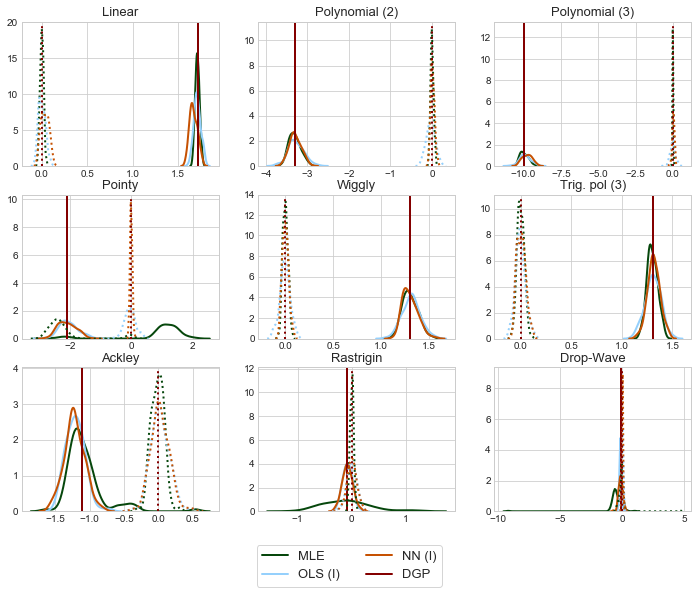

In [3]:
# Average marginal effects 
res_mrgeffs_avg = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_avg_2 = smr.comp_wrapper_gseries(smr.comp_average, 'res_mrgeffs', 
                                           g_functions=g_functions, 
                                             comp_kws = comp_kws_2,
                                           filename = parameters['filename'])

figz.fig_wrapper_g_double(g_series1 = res_mrgeffs_avg,
                          g_series2 = res_mrgeffs_avg_2,
                   g_figfunc = figz.fig_distribution, 
                  g_functions=g_functions, estimators=estimators, 
                  save_file=True, filename=figtitle+'mrgeff_avg_distributions', 
                  legend = 'figure',DGP_last=True,
                  share_y=False, share_x=False)




### Average marginal effects 

In [9]:
importlib.reload(tblz)
tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_avg, 
                            g_series2 = res_mrgeffs_avg_2, 
                    cell_function =tblz.table_cell_avgconf, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    g_subset = table_functions,
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_avgs', 
                    caption='Irrelevant regressors yield zero effects, but there is sampling variation.', 
                    label=figtitle+'table_mrgeff_avgs', 
                    title1 = '$x_{1}$', title2 = '$v_{1}$',
                    note1='\TableIntroAvg'+
                            '\TableMainAvgInterval' \
                + '{'+ '{:,}'.format(parameters['M']) +'}' \
                + '{'+ '{:,}'.format(parameters['k']) +'}' \
                + '{continuous}' \
                + '{'+ '{:,}'.format(parameters['n']) +'}' \
                            + '{'+ '{:,}'.format(parameters['V']) +'}' \
                           )

MLE                                   OLS (I)  \
                            $v_{1}$               $x_{1}$             $v_{1}$   
Linear           -0.00 [-0.04,0.03]      1.71 [1.67,1.76]  -0.00 [-0.06,0.08]   
Polynomial (2)    0.00 [-0.06,0.08]   -3.31 [-3.51,-3.02]  -0.03 [-0.23,0.19]   
Polynomial (3)   -0.00 [-0.05,0.06]  -9.95 [-10.36,-9.38]  -0.02 [-0.46,0.34]   
Pointy          -2.21 [-2.80,-0.03]     0.92 [-2.31,1.85]  -0.04 [-0.39,0.34]   
Wiggly           -0.00 [-0.04,0.05]      1.30 [1.17,1.46]  -0.00 [-0.12,0.09]   
Trig. pol (3)    -0.00 [-0.06,0.06]      1.30 [1.20,1.40]  -0.00 [-0.10,0.10]   
Ackley           -0.01 [-0.17,0.15]   -1.08 [-1.37,-0.37]   0.02 [-0.20,0.27]   
Rastrigin         0.00 [-0.06,0.06]    -0.09 [-0.77,1.02]   0.00 [-0.17,0.16]   
Drop-Wave        -0.05 [-0.49,0.09]    -0.54 [-0.93,0.23]   0.00 [-0.14,0.14]   

                                                  NN (I)                        
                             $x_{1}$             $v_{1}$               $x_{1}$  
Linear              1.71 [1.64,1.78]   0.03 [-0.03,0.11]      1.67 [1.60,1.75]  
Polynomial (2)   -3.27 [-3.68,-2.89]   0.02 [-0.06,0.12]   -3.29 [-3.56,-3.03]  
Polynomial (3)  -9.89 [-10.57,-9.25]   0.03 [-0.14,0.16]  -9.75 [-10.30,-9.14]  
Pointy           -2.04 [-2.56,-1.43]  -0.01 [-0.08,0.07]   -2.10 [-2.52,-1.60]  
Wiggly              1.31 [1.14,1.51]  -0.00 [-0.05,0.06]      1.30 [1.19,1.47]  
Trig. pol (3)       1.31 [1.16,1.45]   0.00 [-0.05,0.10]      1.32 [1.19,1.44]  
Ackley           -1.21 [-1.45,-0.96]   0.02 [-0.20,0.27]   -1.22 [-1.51,-0.92]  
Rastrigin         -0.08 [-0.24,0.07]   0.00 [-0.17,0.17]    -0.08 [-0.27,0.11]  
Drop-Wave        -0.16 [-0.31,-0.02]   0.01 [-0.08,0.07]    -0.14 [-0.40,0.19]

### Estimation of standard error 

In [13]:
importlib.reload(smr)
res_boot_mrgeffs_avg_std = smr.comp_wrapper_gseries(smr.comp_boot_average_sdev, 'res_boot_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_boot_mrgeffs_avg_std_2 = smr.comp_wrapper_gseries(smr.comp_boot_average_sdev, 'res_boot_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws_2,
                                           filename = parameters['filename'])
tblz.table_wrapper_g_double(g_series1 = res_boot_mrgeffs_avg_std, 
                            g_series2 = res_boot_mrgeffs_avg_std_2, 
                            extra_series1 = res_mrgeffs_avg,
                            extra_series2 = res_mrgeffs_avg_2,
                    cell_function =tblz.table_cell_avg_extrastdev, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    g_subset = table_functions,
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_bootstd', 
                    caption='Bootstrap can estimate standard errors, but may need more replications.', 
                    label=figtitle+'table_mrgeff_bootstd', 
                    title1 = '$x_{1}$', title2 = '$v_{1}$',
                    note1='\TableIntroBootStd' \
                            + '\TableMainBootStd' \
                + '{'+ '{:,}'.format(parameters['M']) +'}' \
                + '{'+ '{:,}'.format(parameters['k']) +'}' \
                + '{continuous}' \
                + '{'+ '{:,}'.format(parameters['n']) +'}' \
                            + '{'+ '{:,}'.format(parameters['V']) +'}' \
                            + '{'+ '{:,}'.format(parameters['B']) +'}' \
                           )


C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1315: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
C:\Users\rbjoe\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1320: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


MLE                       OLS (I)                 \
                      $v_{1}$        $x_{1}$        $v_{1}$        $x_{1}$   
Linear          0.019 (0.019)  0.025 (0.023)  0.040 (0.037)  0.040 (0.038)   
Polynomial (2)  0.035 (0.035)  0.098 (0.137)  0.112 (0.104)  0.195 (0.187)   
Polynomial (3)  0.032 (0.029)  0.190 (0.270)  0.176 (0.185)  0.386 (0.361)   
Pointy          0.650 (0.714)  0.901 (1.032)  0.198 (0.178)  0.335 (0.304)   
Wiggly          0.028 (0.027)  0.063 (0.080)  0.052 (0.052)  0.095 (0.094)   
Trig. pol (3)   0.035 (0.034)  0.047 (0.050)  0.051 (0.049)  0.066 (0.075)   
Ackley            inf (0.093)  0.529 (0.282)  0.137 (0.135)  0.141 (0.136)   
Rastrigin       0.033 (0.032)  0.330 (0.438)  0.096 (0.088)  0.095 (0.086)   
Drop-Wave         inf (0.497)    inf (0.926)  0.072 (0.077)  0.073 (0.076)   

                       NN (I)                 
                      $v_{1}$        $x_{1}$  
Linear          0.044 (0.041)  0.044 (0.042)  
Polynomial (2)  0.049 (0.045)  0.106 (0.141)  
Polynomial (3)  0.086 (0.077)  0.260 (0.317)  
Pointy          0.040 (0.038)  0.200 (0.287)  
Wiggly          0.035 (0.031)  0.061 (0.079)  
Trig. pol (3)   0.043 (0.042)  0.054 (0.061)  
Ackley          0.137 (0.134)  0.150 (0.146)  
Rastrigin       0.098 (0.086)  0.107 (0.094)  
Drop-Wave       0.043 (0.042)  0.151 (0.166)

### Hypothesis testing

In [44]:
importlib.reload(tblz)
res_boot_mrgeffs_avg_test = smr.comp_wrapper_gseries(smr.comp_boot_average_test, 'res_boot_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])

res_boot_mrgeffs_avg_test_2 = smr.comp_wrapper_gseries(smr.comp_boot_average_test, 'res_boot_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws_2,
                                           filename = parameters['filename'])
tblz.table_wrapper_g_double(g_series1 = res_boot_mrgeffs_avg_test, 
                            g_series2 = res_boot_mrgeffs_avg_test_2, 
                    cell_function =tblz.table_cell_avg, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    g_subset = table_functions,
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_tests', 
                    caption='Tests of null hypotheses generally reject the right variables..', 
                    label=figtitle+'table_mrgeff_tests', 
                    title1 = '$x_{1}$', title2 = '$v_{1}$',
                    cell_writer=tblz.write_cells,
                    note1='\TableIntroBootTest' \
                            + '\TableMainBootTest' \
                + '{'+ '{:,}'.format(parameters['M']) +'}' \
                + '{'+ '{:,}'.format(parameters['k']) +'}' \
                + '{continuous}' \
                + '{'+ '{:,}'.format(parameters['n']) +'}' \
                            + '{'+ '{:,}'.format(parameters['V']) +'}' \
                            + '{'+ '{:,}'.format(parameters['B']) +'}' \
                           )

MLE         OLS (I)          NN (I)        
               $v_{1}$ $x_{1}$ $v_{1}$ $x_{1}$ $v_{1}$ $x_{1}$
Linear            0.06    1.00    0.05    1.00    0.07    1.00
Polynomial (2)    0.08    1.00    0.06    1.00    0.09    1.00
Polynomial (3)    0.04    1.00    0.09    1.00    0.07    1.00
Pointy            0.32    0.02    0.02    1.00    0.04    1.00
Wiggly            0.05    1.00    0.10    1.00    0.05    1.00
Trig. pol (3)     0.04    1.00    0.05    1.00    0.04    1.00
Ackley            0.00    0.94    0.04    1.00    0.06    1.00
Rastrigin         0.08    0.17    0.08    0.10    0.07    0.12
Drop-Wave         0.00    0.12    0.09    0.60    0.07    0.18

In [55]:
importlib.reload(tblz)
importlib.reload(smr)
res_boot_mrgeffs_avg_conf = smr.comp_wrapper_gseries(smr.comp_boot_average_confint, 'res_boot_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws,
                                           filename = parameters['filename'])

res_boot_mrgeffs_avg_conf_2 = smr.comp_wrapper_gseries(smr.comp_boot_average_confint, 'res_boot_mrgeffs', 
                                           g_functions=g_functions, 
                                           comp_kws = comp_kws_2,
                                           filename = parameters['filename'])
tblz.table_wrapper_g_double(g_series1 = res_boot_mrgeffs_avg_test, 
                            g_series2 = res_boot_mrgeffs_avg_test_2, 
                            extra_series1 = res_boot_mrgeffs_avg_conf,
                            extra_series2 = res_boot_mrgeffs_avg_conf_2,
                    cell_function =tblz.table_cell_avgconf_boot, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    g_subset = table_functions,
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_tests', 
                    caption='Tests and confidence interval works just fine.', 
                    label=figtitle+'table_mrgeff_tests', 
                    title1 = '$x_{1}$', title2 = '$v_{1}$',
                    #cell_writer=tblz.write_cells,
                    note1='\TableIntroBootTest' \
                            + '\TableMainBootTest' \
                + '{'+ '{:,}'.format(parameters['M']) +'}' \
                + '{'+ '{:,}'.format(parameters['k']) +'}' \
                + '{continuous}' \
                + '{'+ '{:,}'.format(parameters['n']) +'}' \
                            + '{'+ '{:,}'.format(parameters['V']) +'}' \
                            + '{'+ '{:,}'.format(parameters['B']) +'}' \
                           )


MLE                                 OLS (I)  \
                          $v_{1}$              $x_{1}$            $v_{1}$   
Linear          0.06 [-0.04,0.04]     1.00 [1.67,1.76]  0.05 [-0.08,0.08]   
Polynomial (2)  0.08 [-0.06,0.07]   1.00 [-3.49,-3.12]  0.06 [-0.24,0.18]   
Polynomial (3)  0.04 [-0.06,0.06]  1.00 [-10.31,-9.59]  0.09 [-0.36,0.31]   
Pointy            0.32 [-inf,inf]      0.02 [-inf,inf]  0.02 [-0.42,0.33]   
Wiggly          0.05 [-0.05,0.05]     1.00 [1.18,1.42]  0.10 [-0.10,0.09]   
Trig. pol (3)   0.04 [-0.07,0.07]     1.00 [1.21,1.39]  0.05 [-0.10,0.09]   
Ackley          0.00 [-0.17,0.16]   0.94 [-1.59,-0.34]  0.04 [-0.23,0.28]   
Rastrigin       0.08 [-0.06,0.07]    0.17 [-0.72,0.53]  0.08 [-0.18,0.18]   
Drop-Wave       0.00 [-0.46,0.90]    0.12 [-1.18,0.73]  0.09 [-0.13,0.14]   

                                                NN (I)                       
                            $x_{1}$            $v_{1}$              $x_{1}$  
Linear             1.00 [1.64,1.79]  0.07 [-0.05,0.11]     1.00 [1.59,1.76]  
Polynomial (2)   1.00 [-3.65,-2.91]  0.09 [-0.08,0.11]   1.00 [-3.49,-3.09]  
Polynomial (3)  1.00 [-10.63,-9.17]  0.07 [-0.16,0.17]  1.00 [-10.30,-9.30]  
Pointy           1.00 [-2.67,-1.41]  0.04 [-0.08,0.07]   1.00 [-2.47,-1.71]  
Wiggly             1.00 [1.13,1.49]  0.05 [-0.07,0.06]     1.00 [1.19,1.42]  
Trig. pol (3)      1.00 [1.18,1.43]  0.04 [-0.08,0.08]     1.00 [1.22,1.42]  
Ackley           1.00 [-1.48,-0.94]  0.06 [-0.23,0.29]   1.00 [-1.51,-0.94]  
Rastrigin         0.10 [-0.26,0.10]  0.07 [-0.18,0.19]    0.12 [-0.28,0.13]  
Drop-Wave        0.60 [-0.30,-0.02]  0.07 [-0.08,0.08]    0.18 [-0.41,0.16]

### MSE for marginal effects

In [51]:
# MRMSE for marginal effects
res_mrgeffs_mse = smr.comp_wrapper_gseries(smr.comp_mse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions,
                                             comp_kws = comp_kws,
                                           filename = parameters['filename'])
res_mrgeffs_mse_2 = smr.comp_wrapper_gseries(smr.comp_mse,'res_mrgeffs', dgp_series = 'res_mrgeffs', 
                                           g_functions=g_functions,
                                             comp_kws = comp_kws_2,
                                           filename = parameters['filename'])

tblz.table_wrapper_g_double(g_series1 = res_mrgeffs_mse, 
                            g_series2 = res_mrgeffs_mse_2, 
                    cell_function =tblz.table_cell_avgstd, 
                    g_functions=g_functions, decimals=parameters['decimals'], print_string=False, 
                    g_subset = table_functions,
                    models = table_subset,
                    save_file = True, filename=figtitle+'table_mrgeff_mse', 
                    caption='Mean RMSE for marginal effects.', 
                    label=figtitle+'table_mrgeff_mse', 
                    title1 = '$x_{1}$', title2 = '$v_{1}$',
                    note1=table_notes)

MLE                          OLS (I)  \
                          $v_{1}$            $x_{1}$       $v_{1}$   
Linear               0.00 (0.000)       0.00 (0.001)  0.00 (0.002)   
Polynomial (2)       0.00 (0.003)       0.00 (0.003)  0.01 (0.015)   
Polynomial (3)       0.01 (0.005)       0.01 (0.006)  0.03 (0.060)   
Pointy              19.06 (6.438)      17.97 (4.662)  0.03 (0.050)   
Wiggly               0.01 (0.011)       0.01 (0.013)  0.00 (0.004)   
Trig. pol (3)        0.00 (0.003)       0.00 (0.004)  0.00 (0.004)   
Ackley               0.16 (0.356)  1039.47 (163.306)  0.02 (0.032)   
Rastrigin            0.04 (0.048)       0.03 (0.043)  0.01 (0.011)   
Drop-Wave       210.58 (2091.400)  740.68 (7083.592)  0.01 (0.010)   

                                        NN (I)                    
                         $x_{1}$       $v_{1}$           $x_{1}$  
Linear              0.00 (0.002)  0.02 (0.010)      0.04 (0.014)  
Polynomial (2)     13.63 (0.650)  0.11 (0.045)      1.22 (0.237)  
Polynomial (3)     62.21 (3.287)  0.43 (0.252)     14.78 (3.817)  
Pointy             64.62 (1.436)  0.08 (0.027)      0.70 (0.178)  
Wiggly              5.12 (0.294)  0.03 (0.011)      0.92 (0.114)  
Trig. pol (3)       1.66 (0.088)  0.03 (0.013)      0.33 (0.083)  
Ackley          1071.10 (40.282)  0.18 (0.131)  1044.60 (44.597)  
Rastrigin         185.03 (4.447)  0.08 (0.098)   177.33 (11.622)  
Drop-Wave          39.11 (0.664)  0.07 (0.039)      8.08 (1.089)